In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import  OrdinalEncoder

In [3]:
train = pd.read_csv('/content/drive/MyDrive/데이터 분석/LG Aimer/train.csv').drop(columns=['ID'])
test = pd.read_csv('/content/drive/MyDrive/데이터 분석/LG Aimer/test.csv').drop(columns=['ID'])

X = train.drop('임신 성공 여부', axis=1)
y = train['임신 성공 여부']

In [4]:
X = X.drop( columns=["착상 전 유전 검사 사용 여부", "착상 전 유전 진단 사용 여부", "배란 유도 유형", "정자 기증자 나이", "정자 출처", "기증자 정자와 혼합된 난자 수", "파트너 정자와 혼합된 난자 수", "대리모 여부", "난자 기증자 나이", "시술 당시 나이", "배아 생성 주요 이유", "난자 채취 경과일", "난자 해동 경과일", "난자 혼합 경과일", "배아 해동 경과일", "클리닉 내 총 시술 횟수", "총 임신 횟수", "DI 임신 횟수", "IVF 임신 횟수", "미세주입 후 저장된 배아 수", "저장된 신선 난자 수", "불임 원인 - 정자 농도", "불임 원인 - 정자 면역학적 요인", "불임 원인 - 정자 운동성", "불임 원인 - 정자 형태", "불임 원인 - 여성 요인", "불임 원인 - 자궁경부 문제", "시술 시기 코드", "시술 유형"] )

test = test.drop( columns=["착상 전 유전 검사 사용 여부", "착상 전 유전 진단 사용 여부", "배란 유도 유형", "정자 기증자 나이", "정자 출처", "기증자 정자와 혼합된 난자 수", "파트너 정자와 혼합된 난자 수", "대리모 여부", "난자 기증자 나이", "시술 당시 나이", "배아 생성 주요 이유", "난자 채취 경과일", "난자 해동 경과일", "난자 혼합 경과일", "배아 해동 경과일", "클리닉 내 총 시술 횟수", "총 임신 횟수", "DI 임신 횟수", "IVF 임신 횟수", "미세주입 후 저장된 배아 수", "저장된 신선 난자 수", "불임 원인 - 정자 농도", "불임 원인 - 정자 면역학적 요인", "불임 원인 - 정자 운동성", "불임 원인 - 정자 형태", "불임 원인 - 여성 요인", "불임 원인 - 자궁경부 문제", "시술 시기 코드", "시술 유형"] )

In [5]:
categorical_columns = [
    "시술 시기 코드",
    "시술 당시 나이",
    "시술 유형",
    "특정 시술 유형",
    "배란 자극 여부",
    "배란 유도 유형",
    "단일 배아 이식 여부",
    "착상 전 유전 검사 사용 여부",
    "착상 전 유전 진단 사용 여부",
    "남성 주 불임 원인",
    "남성 부 불임 원인",
    "여성 주 불임 원인",
    "여성 부 불임 원인",
    "부부 주 불임 원인",
    "부부 부 불임 원인",
    "불명확 불임 원인",
    "불임 원인 - 난관 질환",
    "불임 원인 - 남성 요인",
    "불임 원인 - 배란 장애",
    "불임 원인 - 여성 요인",
    "불임 원인 - 자궁경부 문제",
    "불임 원인 - 자궁내막증",
    "불임 원인 - 정자 농도",
    "불임 원인 - 정자 면역학적 요인",
    "불임 원인 - 정자 운동성",
    "불임 원인 - 정자 형태",
    "배아 생성 주요 이유",
    "총 시술 횟수",
    "클리닉 내 총 시술 횟수",
    "IVF 시술 횟수",
    "DI 시술 횟수",
    "총 임신 횟수",
    "IVF 임신 횟수",
    "DI 임신 횟수",
    "총 출산 횟수",
    "IVF 출산 횟수",
    "DI 출산 횟수",
    "난자 출처",
    "정자 출처",
    "난자 기증자 나이",
    "정자 기증자 나이",
    "동결 배아 사용 여부",
    "신선 배아 사용 여부",
    "기증 배아 사용 여부",
    "대리모 여부",
    "PGD 시술 여부",
    "PGS 시술 여부"
]

In [6]:
numeric_columns = [
    "임신 시도 또는 마지막 임신 경과 연수",
    "총 생성 배아 수",
    "미세주입된 난자 수",
    "미세주입에서 생성된 배아 수",
    "이식된 배아 수",
    "미세주입 배아 이식 수",
    "저장된 배아 수",
    "미세주입 후 저장된 배아 수",
    "해동된 배아 수",
    "해동 난자 수",
    "수집된 신선 난자 수",
    "저장된 신선 난자 수",
    "혼합된 난자 수",
    "파트너 정자와 혼합된 난자 수",
    "기증자 정자와 혼합된 난자 수",
    "난자 채취 경과일",
    "난자 해동 경과일",
    "난자 혼합 경과일",
    "배아 이식 경과일",
    "배아 해동 경과일"
]

In [7]:
# categorical_coulumns 에서 안쓰는 컬럼 삭제
discard_columns = ["착상 전 유전 검사 사용 여부", "착상 전 유전 진단 사용 여부", "배란 유도 유형", "정자 기증자 나이", "정자 출처", "기증자 정자와 혼합된 난자 수", "파트너 정자와 혼합된 난자 수", "대리모 여부", "난자 기증자 나이", "시술 당시 나이", "배아 생성 주요 이유", "난자 채취 경과일", "난자 해동 경과일", "난자 혼합 경과일", "배아 해동 경과일", "클리닉 내 총 시술 횟수", "총 임신 횟수", "DI 임신 횟수", "IVF 임신 횟수", "미세주입 후 저장된 배아 수", "저장된 신선 난자 수", "불임 원인 - 정자 농도", "불임 원인 - 정자 면역학적 요인", "불임 원인 - 정자 운동성", "불임 원인 - 정자 형태", "불임 원인 - 여성 요인", "불임 원인 - 자궁경부 문제", "시술 시기 코드", "시술 유형"]
categorical_columns = [col for col in categorical_columns if col not in discard_columns]

In [8]:
# numeric_coulumns 에서 안쓰는 컬럼 삭제
discard_columns = ["착상 전 유전 검사 사용 여부", "착상 전 유전 진단 사용 여부", "배란 유도 유형", "정자 기증자 나이", "정자 출처", "기증자 정자와 혼합된 난자 수", "파트너 정자와 혼합된 난자 수", "대리모 여부", "난자 기증자 나이", "시술 당시 나이", "배아 생성 주요 이유", "난자 채취 경과일", "난자 해동 경과일", "난자 혼합 경과일", "배아 해동 경과일", "클리닉 내 총 시술 횟수", "총 임신 횟수", "DI 임신 횟수", "IVF 임신 횟수", "미세주입 후 저장된 배아 수", "저장된 신선 난자 수", "불임 원인 - 정자 농도", "불임 원인 - 정자 면역학적 요인", "불임 원인 - 정자 운동성", "불임 원인 - 정자 형태", "불임 원인 - 여성 요인", "불임 원인 - 자궁경부 문제", "시술 시기 코드", "시술 유형"]
numeric_columns = [col for col in numeric_columns if col not in discard_columns]

# 데이터 전처리

In [9]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

### 전체 데이터 유형 파악

In [ ]:
for col in categorical_columns:
    unique_values = train[col].value_counts()
    print(unique_values)
    print("-" * 50)

시술 시기 코드
TRDQAZ    38969
TRCMWS    38090
TRYBLT    36713
TRVNRY    36173
TRJXFG    36031
TRZKPL    35544
TRXQMD    34831
Name: count, dtype: int64
--------------------------------------------------
시술 당시 나이
만18-34세    102476
만35-37세     57780
만38-39세     39247
만40-42세     37348
만43-44세     12253
만45-50세      6918
알 수 없음        329
Name: count, dtype: int64
--------------------------------------------------
시술 유형
IVF    250060
DI       6291
Name: count, dtype: int64
--------------------------------------------------
특정 시술 유형
ICSI                                   122368
IVF                                     91755
Unknown                                 26939
IUI                                      6100
ICSI:ICSI                                2314
ICSI / BLASTOCYST                        1609
IVF / BLASTOCYST                         1248
IVF:IVF                                  1146
ICSI:IVF                                  873
ICSI / AH                                 769
IVF:ICSI  

In [ ]:
for col in numeric_columns:
    unique_values = train[col].value_counts()
    print(unique_values)
    print("-" * 50)

임신 시도 또는 마지막 임신 경과 연수
7.0     1214
8.0     1176
9.0     1023
6.0      991
10.0     947
11.0     701
5.0      692
12.0     510
13.0     481
14.0     331
4.0      305
15.0     254
16.0     202
17.0     140
18.0     106
3.0       89
19.0      86
20.0      83
2.0       21
0.0       12
1.0        6
Name: count, dtype: int64
--------------------------------------------------
총 생성 배아 수
0.0     53349
4.0     21612
3.0     20952
5.0     20410
2.0     19190
6.0     18623
7.0     16029
1.0     15223
8.0     13620
9.0     11131
10.0     9065
11.0     7090
12.0     5720
13.0     4321
14.0     3360
15.0     2516
16.0     1916
17.0     1504
18.0     1117
19.0      799
20.0      640
21.0      461
22.0      354
23.0      266
24.0      195
25.0      163
26.0      105
27.0       84
28.0       51
29.0       46
30.0       40
31.0       25
32.0       23
34.0       15
33.0       12
37.0        7
36.0        7
35.0        4
38.0        3
42.0        3
44.0        3
51.0        2
41.0        2
40.0        1
43

# 히스토그램 분석

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51076 (\N{HANGUL SYLLABLE IM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49888 (\N{HANGUL SYLLABLE SIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


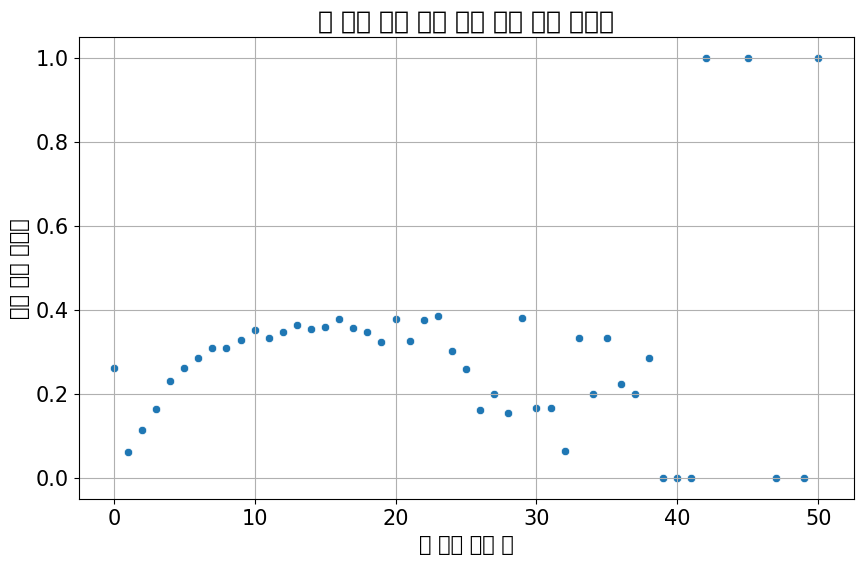

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# 그룹별 평균 임신 성공률
grouped_data = train.groupby('기증자 정자와 혼합된 난자 수')['임신 성공 여부'].mean().reset_index()

# 산점도 플롯
plt.figure(figsize=(10, 6))
sns.scatterplot(x=grouped_data['기증자 정자와 혼합된 난자 수'], y=grouped_data['임신 성공 여부'])

plt.xlabel('총 생성 배아 수')
plt.ylabel('평균 임신 성공률')
plt.title('총 생성 배아 수에 따른 평균 임신 성공률')
plt.grid(True)
plt.show()


In [ ]:
# 25 이상 데이터는 25로 변경
X['총 생성 배아 수'] = X['총 생성 배아 수'].apply(lambda x: 25 if x >= 25 else x)
test['총 생성 배아 수'] = test['총 생성 배아 수'].apply(lambda x: 25 if x >= 25 else x)
X['총 생성 배아 수'].value_counts()

,count
총 생성 배아 수,
0.0,53349
4.0,21612
3.0,20952
5.0,20410
2.0,19190
6.0,18623
7.0,16029
1.0,15223
8.0,13620


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48120 (\N{HANGUL SYLLABLE MI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51077 (\N{HANGUL SYLLABLE IB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/

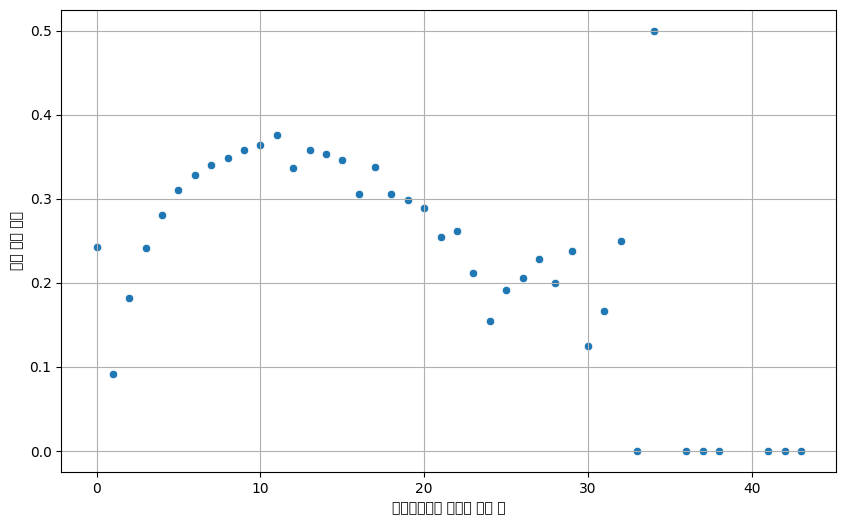

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 그룹별 평균 임신 성공률
grouped_data = train.groupby('미세주입에서 생성된 배아 수')['임신 성공 여부'].mean().reset_index()

# 산점도 플롯
plt.figure(figsize=(10, 6))
sns.scatterplot(x=grouped_data['미세주입에서 생성된 배아 수'], y=grouped_data['임신 성공 여부'])

plt.grid(True)
plt.show()


### 0. 컬럼 삭제

In [ ]:
a = train.groupby('시술 시기 코드')['임신 성공 여부'].mean()
a

,임신 성공 여부
시술 시기 코드,
TRCMWS,0.257417
TRDQAZ,0.245426
TRJXFG,0.266271
TRVNRY,0.259779
TRXQMD,0.256122
TRYBLT,0.269087
TRZKPL,0.255120


In [ ]:
a = train.groupby('배란 유도 유형')['임신 성공 여부'].mean()
a

,임신 성공 여부
배란 유도 유형,
기록되지 않은 시행,0.268407
생식선 자극 호르몬,1.000000
세트로타이드 (억제제),0.000000
알 수 없음,0.226755


In [ ]:
a = train.groupby('기증자 정자와 혼합된 난자 수')['임신 성공 여부'].mean()
a

,임신 성공 여부
기증자 정자와 혼합된 난자 수,
0.0,0.260448
1.0,0.062331
2.0,0.112514
3.0,0.164300
4.0,0.229426
5.0,0.261503
6.0,0.284041
7.0,0.308917
8.0,0.307890


In [ ]:
a = train.groupby('파트너 정자와 혼합된 난자 수')['임신 성공 여부'].mean()
a

,임신 성공 여부
파트너 정자와 혼합된 난자 수,
0.0,0.217463
1.0,0.060643
2.0,0.107713
3.0,0.162229
4.0,0.203367
5.0,0.248928
6.0,0.262590
7.0,0.282946
8.0,0.301421


In [ ]:
a = train.groupby('대리모 여부')['임신 성공 여부'].mean()
a

,임신 성공 여부
대리모 여부,
0.0,0.261490
1.0,0.288847


In [ ]:
a = train.groupby('클리닉 내 총 시술 횟수')['임신 성공 여부'].mean()
a

,임신 성공 여부
클리닉 내 총 시술 횟수,
0회,0.282918
1회,0.245377
2회,0.237949
3회,0.232445
4회,0.221901
5회,0.207561
6회 이상,0.198483


In [ ]:
a = train.groupby('총 시술 횟수')['임신 성공 여부'].mean()
a

,임신 성공 여부
총 시술 횟수,
0회,0.290987
1회,0.249952
2회,0.244166
3회,0.236354
4회,0.227792
5회,0.215792
6회 이상,0.203300


In [ ]:
train['총 출산 횟수'] = train['총 출산 횟수'].replace({'0회': '0회', '1회': '1회',
                                              '2회': '2회 이상', '3회': '2회 이상',
                                              '4회': '2회 이상', '5회': '2회 이상',
                                              '6회 이상': '2회 이상'})
train['IVF 출산 횟수'] = train['IVF 출산 횟수'].replace({'0회': '0회', '1회': '1회',
                                              '2회': '2회 이상', '3회': '2회 이상',
                                              '4회': '2회 이상', '5회': '2회 이상',
                                              '6회 이상': '2회 이상'})
train['DI 출산 횟수'] = train['DI 출산 횟수'].replace({'0회': '0회', '1회': '1회',
                                              '2회': '2회 이상', '3회': '2회 이상',
                                              '4회': '2회 이상', '5회': '2회 이상',
                                              '6회 이상': '2회 이상'})

In [ ]:
train['총 임신 횟수'] = train['총 임신 횟수'].replace({'0회': '0회', '1회': '1회',
                                              '2회': '2회 이상', '3회': '2회 이상',
                                              '4회': '2회 이상', '5회': '2회 이상',
                                              '6회 이상': '2회 이상'})
train['IVF 임신 횟수'] = train['IVF 임신 횟수'].replace({'0회': '0회', '1회': '1회',
                                              '2회': '2회 이상', '3회': '2회 이상',
                                              '4회': '2회 이상', '5회': '2회 이상',
                                              '6회 이상': '2회 이상'})
train['DI 임신 횟수'] = train['DI 임신 횟수'].replace({'0회': '0회', '1회': '1회',
                                              '2회': '2회 이상', '3회': '2회 이상',
                                              '4회': '2회 이상', '5회': '2회 이상',
                                              '6회 이상': '2회 이상'})

In [ ]:
a = train.groupby('총 임신 횟수')['임신 성공 여부'].mean()
a

,임신 성공 여부
총 임신 횟수,
0회,0.257455
1회,0.262908
2회 이상,0.256060


In [ ]:
a = train.groupby('총 출산 횟수')['임신 성공 여부'].mean()
a

,임신 성공 여부
총 출산 횟수,
0회,0.256851
1회,0.267240
2회 이상,0.263700


In [ ]:
a = train.groupby('DI 임신 횟수')['임신 성공 여부'].mean()
a

,임신 성공 여부
DI 임신 횟수,
0회,0.258849
1회,0.209143
2회 이상,0.264151


In [ ]:
a = train.groupby('DI 출산 횟수')['임신 성공 여부'].mean()
a

,임신 성공 여부
DI 출산 횟수,
0회,0.258617
1회,0.229186
2회 이상,0.230392


In [ ]:
a = train.groupby('IVF 임신 횟수')['임신 성공 여부'].mean()
a

,임신 성공 여부
IVF 임신 횟수,
0회,0.256851
1회,0.266408
2회 이상,0.254893


In [ ]:
a = train.groupby('IVF 출산 횟수')['임신 성공 여부'].mean()
a

,임신 성공 여부
IVF 출산 횟수,
0회,0.256545
1회,0.269881
2회 이상,0.264733


In [ ]:
a = train.groupby('배아 해동 경과일')['임신 성공 여부'].mean()
a

,임신 성공 여부
배아 해동 경과일,
0.0,0.229668
1.0,0.162162
2.0,0.159341
3.0,0.109756
4.0,0.000000
5.0,0.214286
6.0,0.166667
7.0,0.000000


### 1. 결측치 존재 컬럼

In [ ]:
# 결측값이 있는 컬럼만 추출
missing_values = X.isnull().sum()

# 결측값이 있는 컬럼만 필터링
missing_columns = missing_values[missing_values > 0]

# 결과 출력
print("결측값이 있는 컬럼과 그 개수:")
print(missing_columns)

결측값이 있는 컬럼과 그 개수:
임신 시도 또는 마지막 임신 경과 연수    246981
특정 시술 유형                      2
단일 배아 이식 여부                6291
배아 생성 주요 이유                6291
총 생성 배아 수                  6291
미세주입된 난자 수                 6291
미세주입에서 생성된 배아 수            6291
이식된 배아 수                   6291
미세주입 배아 이식 수               6291
저장된 배아 수                   6291
미세주입 후 저장된 배아 수            6291
해동된 배아 수                   6291
해동 난자 수                    6291
수집된 신선 난자 수                6291
저장된 신선 난자 수                6291
혼합된 난자 수                   6291
동결 배아 사용 여부                6291
신선 배아 사용 여부                6291
기증 배아 사용 여부                6291
PGD 시술 여부                254172
PGS 시술 여부                254422
난자 채취 경과일                 57488
난자 해동 경과일                254915
난자 혼합 경과일                 53735
배아 이식 경과일                 43566
배아 해동 경과일                215982
dtype: int64


### PGS, PGD 관련 컬럼

In [ ]:
bfpgd = train[['착상 전 유전 진단 사용 여부']].value_counts()[1]
bfpgs = train[['착상 전 유전 검사 사용 여부']].value_counts()[1]
pgd = train[['PGD 시술 여부']].value_counts()[1]
pgs = train[['PGS 시술 여부']].value_counts()[1]
count0 = train[(train['PGD 시술 여부'] == 1) & (train['착상 전 유전 진단 사용 여부'] == 1)].shape[0]
count1 = train[(train['PGS 시술 여부'] == 1) & (train['착상 전 유전 검사 사용 여부'] == 1)].shape[0]

print("착상 전 유전 진단 사용 여부 : {}" .format(bfpgd))
print()
print("착상 전 유전 진단 사용 여부 : {}" .format(bfpgs))
print()
print("PGD 시술 여부 : {}" .format(pgd))
print()
print("PGS 시술 여부 : {}" .format(pgs))
print()
print("PGD & 착상 전 유전 진단 : {}" .format(count0))
print()
print("PGS & 착상 전 유전 검사 : {}" .format(count1))

착상 전 유전 진단 사용 여부 : 3196

착상 전 유전 진단 사용 여부 : 2718

PGD 시술 여부 : 2179

PGS 시술 여부 : 1929

PGD & 착상 전 유전 진단 : 2179

PGS & 착상 전 유전 검사 : 1929


In [ ]:
# 착상 전 유전 검사 사용 인원의 임신 성공 VS PGS 시술 시행 인원의 임신 성공

count0 = train[(train['착상 전 유전 검사 사용 여부'] == 1) & (train['임신 성공 여부'] == 1)].shape[0]
count1 = train[(train['PGS 시술 여부'] == 1) & (train['임신 성공 여부'] == 1)].shape[0]
print("유전 검사 ∩ 임신 성공 : {0}, PGS ∩ 임신 성공 : {1}" .format(count0, count1))

유전 검사 ∩ 임신 성공 : 403, PGS ∩ 임신 성공 : 398


In [ ]:
# 착상 전 유전 진단 사용 인원의 임신 성공 VS PGD 시술 시행 인원의 임신 성공

count0 = train[(train['착상 전 유전 진단 사용 여부'] == 1) & (train['임신 성공 여부'] == 1)].shape[0]
count1 = train[(train['PGD 시술 여부'] == 1) & (train['임신 성공 여부'] == 1)].shape[0]
print("유전 진단 ∩ 임신 성공 : {0}, PGD ∩ 임신 성공: {1}" .format(count0, count1))

유전 진단 ∩ 임신 성공 : 614, PGD ∩ 임신 성공: 609


=> 임신 성공 여부 차이 X  
=> PGS 시술 여부, PGD 시술 여부 컬럼으로 병합

### 결측치 6291 컬럼 분석

공통점 :
1. DI 시술 환자: 6291명  
  @ DI (Donor Insemination) 시술  
  - 기증자의 정자 이용
  - 자궁 경부를 통과하는 미세한 튜브를 사용, 기증자 정자 샘플을 자궁에 넣는 시술
2. 시술 유형이 DI인 환자들은 공통적으로 17개 컬럼에 대해 모두 결측치가 6291
3. 해당 17개 컬럼 : 배아 이식 관련 컬럼 (Di 시술은 자궁 내 직접 주입이므로 결측치임)

In [ ]:
X['시술 유형'].value_counts()

,count
시술 유형,
IVF,250060
DI,6291


< 결측값이 6291인 Data만 추출 >

In [ ]:
# 결측값이 있는 컬럼만 추출
emp6291_values = X.isnull().sum()

# 결측값이 6291인 컬럼만 필터링
emp6291_columns = emp6291_values[emp6291_values == 6291]

# 결측값이 6291인 컬럼들의 컬럼 이름만 리스트로 추출
emp6291_cols_list = emp6291_columns.index.tolist()

# 시술 유형이 DI인 행 / 결측값이 6291인 컬럼들의 Data만 추출 (random하게 100개씩 출력)
emp6291 = X.loc[X['시술 유형'].isin(['DI']), emp6291_cols_list]
emp6291.sample(n = 100)

,단일 배아 이식 여부,배아 생성 주요 이유,총 생성 배아 수,미세주입된 난자 수,미세주입에서 생성된 배아 수,이식된 배아 수,미세주입 배아 이식 수,저장된 배아 수,미세주입 후 저장된 배아 수,해동된 배아 수,해동 난자 수,수집된 신선 난자 수,저장된 신선 난자 수,혼합된 난자 수,동결 배아 사용 여부,신선 배아 사용 여부,기증 배아 사용 여부
123589,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
249460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8929,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
210117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
236678,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
160548,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
224088,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
emp6291.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6291 entries, 14 to 256326
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   단일 배아 이식 여부      0 non-null      float64
 1   배아 생성 주요 이유      0 non-null      object 
 2   총 생성 배아 수        0 non-null      float64
 3   미세주입된 난자 수       0 non-null      float64
 4   미세주입에서 생성된 배아 수  0 non-null      float64
 5   이식된 배아 수         0 non-null      float64
 6   미세주입 배아 이식 수     0 non-null      float64
 7   저장된 배아 수         0 non-null      float64
 8   미세주입 후 저장된 배아 수  0 non-null      float64
 9   해동된 배아 수         0 non-null      float64
 10  해동 난자 수          0 non-null      float64
 11  수집된 신선 난자 수      0 non-null      float64
 12  저장된 신선 난자 수      0 non-null      float64
 13  혼합된 난자 수         0 non-null      float64
 14  동결 배아 사용 여부      0 non-null      float64
 15  신선 배아 사용 여부      0 non-null      float64
 16  기증 배아 사용 여부      0 non-null      float64
dtypes: float64(16), 

### 기증 관련 컬럼
결론
- 난자 출처 - 알 수 없음 : 본인 제공으로 처리
- 정자 기증자 나이 : 임신 성공 여부와 무관, 삭제
- 임신 성공 여부는 난자 자체의 나이와 관련 있으므로  
  1. 난자 나이라는 컬럼 신설
  2. 난자 출처 - 본인 제공, 알 수 없음 인 환자 : '난자 나이' = 시술 당시 나이  
  난자 출처 - 기증 제공 인 환자 : '난자 나이' = 시술 당시 나이 - 18-34세
  3. '시술 당시 나이', '난자 기증자 나이' 컬럼 삭제

1. 난자 출처

In [ ]:
X['난자 출처'].value_counts()

,count
난자 출처,
본인 제공,234291
기증 제공,15769
알 수 없음,6291


In [ ]:
# '알 수 없음'은 모두 'Di 시술'이므로 -> '본인 제공'으로 채우기

2. 나이 관련

In [ ]:
X['시술 당시 나이'].value_counts()

,count
시술 당시 나이,
만18-34세,102476
만35-37세,57780
만38-39세,39247
만40-42세,37348
만43-44세,12253
만45-50세,6918
알 수 없음,329


In [ ]:
pregnancy_success_by_age = train.groupby('시술 당시 나이')['임신 성공 여부'].mean()
pregnancy_success_by_age

,임신 성공 여부
시술 당시 나이,
만18-34세,0.322622
만35-37세,0.278401
만38-39세,0.217138
만40-42세,0.159393
만43-44세,0.118012
만45-50세,0.167679
알 수 없음,0.000000


In [ ]:
# 나이는 매우 중요한 factor / 시술 당시 나이가 알 수 없음인 환자의 데이터는 삭제

In [ ]:
X['난자 기증자 나이'].value_counts()

,count
난자 기증자 나이,
알 수 없음,242381
만31-35세,6366
만26-30세,4976
만21-25세,2334
만20세 이하,294


In [ ]:
pregnancy_success_by_age = train.groupby('난자 기증자 나이')['임신 성공 여부'].mean()
pregnancy_success_by_age

,임신 성공 여부
난자 기증자 나이,
만20세 이하,0.261905
만21-25세,0.329906
만26-30세,0.348272
만31-35세,0.305215
알 수 없음,0.254579


In [ ]:
count0 = X[(X['난자 출처'] == '본인 제공')].shape[0]
count1 = X[(X['난자 출처'] == '본인 제공') & (X['난자 기증자 나이'] == '알 수 없음')].shape[0]
print("[난자 출처 - 본인 제공] : {0}, [난자 출처 - 본인 제공 中 난자 기증자 나이 - 알 수 없음] : {1}" .format(count0, count1))

[난자 출처 - 본인 제공] : 234291, [난자 출처 - 본인 제공 中 난자 기증자 나이 - 알 수 없음] : 234291


In [ ]:
count0 = X[(X['난자 출처'] == '알 수 없음')].shape[0]
count1 = X[(X['난자 출처'] == '알 수 없음') & (X['난자 기증자 나이'] == '알 수 없음')].shape[0]
print("[난자 출처 - 알 수 없음] : {0}, [난자 출처 - 알 수 없음 中 난자 기증자 나이 - 알 수 없음] : {1}" .format(count0, count1))

[난자 출처 - 알 수 없음] : 6291, [난자 출처 - 알 수 없음 中 난자 기증자 나이 - 알 수 없음] : 6291


In [ ]:
count0 = X[(X['난자 출처'] == '기증 제공')].shape[0]
count1 = X[(X['난자 출처'] == '기증 제공') & (X['난자 기증자 나이'] == '알 수 없음')].shape[0]
print("[난자 출처 - 기증 제공] : {0}, [난자 출처 - 기증 제공 中 난자 기증자 나이 - 알 수 없음] : {1}" .format(count0, count1))

[난자 출처 - 기증 제공] : 15769, [난자 출처 - 기증 제공 中 난자 기증자 나이 - 알 수 없음] : 1799


In [ ]:
# 1. '난자 나이' 컬럼 추가
# 2. '난자 출처 - 본인 제공, 알 수 없음 인 환자 : '난자 나이' = 시술 당시 나이
#    '난자 출처 - 기증 제공 인 환자 : '난자 나이' = 시술 당시 나이 - 18-34세
# 3. '시술 당시 나이', '난자 기증자 나이' 컬럼 삭제

In [ ]:
X['정자 기증자 나이'].value_counts()

,count
정자 기증자 나이,
알 수 없음,230518
만21-25세,5667
만36-40세,5282
만26-30세,5058
만31-35세,4911
만41-45세,3848
만20세 이하,1067


In [ ]:
pregnancy_success_by_age = train.groupby('정자 기증자 나이')['임신 성공 여부'].mean()
pregnancy_success_by_age

,임신 성공 여부
정자 기증자 나이,
만20세 이하,0.209934
만21-25세,0.241398
만26-30세,0.248122
만31-35세,0.248626
만36-40세,0.245740
만41-45세,0.242983
알 수 없음,0.259967


In [ ]:
# 정자 기증자 나이와 임신 성공 여부는 상관관계 X -> 컬럼 삭제

In [ ]:
train['임신 시도 또는 마지막 임신 경과 연수'].mean()

,count
임신 시도 또는 마지막 임신 경과 연수,
7.0,1214
8.0,1176
9.0,1023
6.0,991
10.0,947
11.0,701
5.0,692
12.0,510
13.0,481


In [ ]:
pregnancy_success_by_age = train[train['임신 시도 또는 마지막 임신 경과 연수'].isna()]['임신 성공 여부'].mean()
pregnancy_success_by_age

0.2599268769662444

In [ ]:
pregnancy_success_by_age = train.groupby('배아 이식 경과일')['임신 성공 여부'].mean()
pregnancy_success_by_age

NameError: name 'train' is not defined

In [ ]:
train.groupby('임신 시도 또는 마지막 임신 경과 연수')['임신 성공 여부'].mean().dropna()

,임신 성공 여부
임신 시도 또는 마지막 임신 경과 연수,
0.0,0.333333
1.0,0.333333
2.0,0.190476
3.0,0.247191
4.0,0.242623
5.0,0.245665
6.0,0.249243
7.0,0.235585
8.0,0.215136


In [ ]:
X['특정 시술 유형'].value_counts()

,count
특정 시술 유형,
ICSI,122368
IVF,91755
Unknown,26939
IUI,6100
ICSI:ICSI,2314
ICSI / BLASTOCYST,1609
IVF / BLASTOCYST,1248
IVF:IVF,1146
ICSI:IVF,873


In [ ]:
for col in categorical_columns:
    unique_values = X_train_encoded[col].value_counts()
    print(unique_values)
    print("-" * 50)

Column: 시술 시기 코드
시술 시기 코드
1.0    38969
0.0    38090
5.0    36713
3.0    36173
2.0    36031
6.0    35544
4.0    34831
Name: count, dtype: int64
--------------------------------------------------
Column: 시술 당시 나이
시술 당시 나이
0.0    102476
1.0     57780
2.0     39247
3.0     37348
4.0     12253
5.0      6918
6.0       329
Name: count, dtype: int64
--------------------------------------------------
Column: 시술 유형
시술 유형
1.0    250060
0.0      6291
Name: count, dtype: int64
--------------------------------------------------
Column: 특정 시술 유형
특정 시술 유형
4.0     122368
15.0     91755
23.0     26939
14.0      6100
11.0      2314
7.0       1609
18.0      1248
20.0      1146
12.0       873
5.0        769
19.0       392
16.0       319
13.0       207
21.0       100
3.0         96
2.0         71
22.0        23
10.0         6
9.0          4
0.0          3
17.0         2
1.0          2
24.0         2
6.0          2
8.0          1
Name: count, dtype: int64
--------------------------------------------------
Co

In [ ]:
for col in numeric_columns:
    unique_values = X_train_encoded[col].unique()
    print(unique_values)
    print("-" * 50)

In [ ]:
for col in numeric_columns:
    unique_values = X_train_encoded[col].value_counts()
    print(unique_values)
    print("-" * 50)

Column: 임신 시도 또는 마지막 임신 경과 연수
임신 시도 또는 마지막 임신 경과 연수
0.0     246993
7.0       1214
8.0       1176
9.0       1023
6.0        991
10.0       947
11.0       701
5.0        692
12.0       510
13.0       481
14.0       331
4.0        305
15.0       254
16.0       202
17.0       140
18.0       106
3.0         89
19.0        86
20.0        83
2.0         21
1.0          6
Name: count, dtype: int64
--------------------------------------------------
Column: 총 생성 배아 수
총 생성 배아 수
0.0     59640
4.0     21612
3.0     20952
5.0     20410
2.0     19190
6.0     18623
7.0     16029
1.0     15223
8.0     13620
9.0     11131
10.0     9065
11.0     7090
12.0     5720
13.0     4321
14.0     3360
15.0     2516
16.0     1916
17.0     1504
18.0     1117
19.0      799
20.0      640
21.0      461
22.0      354
23.0      266
24.0      195
25.0      163
26.0      105
27.0       84
28.0       51
29.0       46
30.0       40
31.0       25
32.0       23
34.0       15
33.0       12
37.0        7
36.0        7
35.0      

### 카테고리형 컬럼 전처리

1. 카테고리형 컬럼들을 문자열로 변환 (ordinal encoding을 위해)

In [ ]:
for col in categorical_columns:
    X[col] = X[col].astype(str)
    test[col] = test[col].astype(str)

2. 정수로 변환하는 과정
- ordinal encoding은 array를 알파벳 순으로 정렬 후 0, 1, 2 ... 로 매핑
- 그 결과 array의 원소들이 알파벳 순서대로 0, 1, 2 ... 의 정수들로 매핑됨

In [ ]:
ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
# OrdinalEncoder는 범주형 데이터를 정수로 변환하는 인코더
# handle_unknown='use_encoded_value':학습하지 않은 범주(즉, 훈련 데이터에 없었던 범주)가 transform 과정에서 나오면, 이 값을 지정된 unknown_value로 대체

X_train_encoded = X.copy()
# X.copy(): X의 DataFrame을 복사하여 X_train_encoded라는 새 변수에 저장
X_train_encoded[categorical_columns] = ordinal_encoder.fit_transform(X[categorical_columns]) # fit_transform -> 학습과 변환을 동시에
# fit()은 X[categorical_columns] 데이터를 학습하여 범주별 정수 인덱스 매핑을 생성

X_test_encoded = test.copy()
X_test_encoded[categorical_columns] = ordinal_encoder.transform(test[categorical_columns]) # 변환만

In [ ]:
categories = ordinal_encoder.categories_
categories

[array(['TRCMWS', 'TRDQAZ', 'TRJXFG', 'TRVNRY', 'TRXQMD', 'TRYBLT',
        'TRZKPL'], dtype=object),
 array(['만18-34세', '만35-37세', '만38-39세', '만40-42세', '만43-44세', '만45-50세',
        '알 수 없음'], dtype=object),
 array(['DI', 'IVF'], dtype=object),
 array(['FER', 'GIFT', 'Generic DI', 'ICI', 'ICSI', 'ICSI / AH',
        'ICSI / AH:Unknown', 'ICSI / BLASTOCYST ',
        'ICSI / BLASTOCYST :ICSI', 'ICSI / BLASTOCYST :IVF / BLASTOCYST',
        'ICSI / BLASTOCYST:IVF / BLASTOCYST', 'ICSI:ICSI', 'ICSI:IVF',
        'ICSI:Unknown', 'IUI', 'IVF', 'IVF / AH', 'IVF / AH:ICSI / AH',
        'IVF / BLASTOCYST', 'IVF:ICSI', 'IVF:IVF', 'IVF:Unknown', 'IVI',
        'Unknown', 'nan'], dtype=object),
 array(['0', '1'], dtype=object),
 array(['기록되지 않은 시행', '생식선 자극 호르몬', '세트로타이드 (억제제)', '알 수 없음'], dtype=object),
 array(['0.0', '1.0', 'nan'], dtype=object),
 array(['1.0', 'nan'], dtype=object),
 array(['0.0', '1.0', 'nan'], dtype=object),
 array(['0', '1'], dtype=object),
 array(['0', '1'], dtype=object

### 수치형 컬럼 전처리

- 결측치 단순히 0으로 채우는 과정

In [ ]:
X_train_encoded[numeric_columns] = X_train_encoded[numeric_columns].fillna(0)
X_test_encoded[numeric_columns] = X_test_encoded[numeric_columns].fillna(0)

### Train

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# 기본설정 랜덤포레스트
rf = RandomForestClassifier(n_jobs=-1) # 모든 코어 사용

# 피쳐중요도만 확인할 것이기 때문에 fit만 한다.
rf.fit(X_train_encoded, y)

# 그냥 확인하기에 피쳐종류가 30개나 되어 한눈에 들어오지 않는다.
print(rf.feature_importances_, '\n')

# 시리즈로 만들어 인덱스를 붙인다
ser = pd.Series(rf.feature_importances_, index=X_train_encoded.columns)

# 내림차순 정렬을 이용한다
top20 = ser.sort_values(ascending=False)[:21]
mid00 = ser.sort_values(ascending=False)[21:49]
bot20 = ser.sort_values(ascending=False)[50:70]
print(top20), print(mid00), print(bot20)

[1.17144041e-01 5.79268442e-02 5.41417776e-03 7.52366028e-05
 1.38601677e-02 2.50941463e-03 2.06211857e-03 1.46788339e-02
 1.09828341e-03 1.50557975e-03 1.74051509e-03 1.21568485e-03
 1.90720963e-03 1.16535900e-03 1.86999982e-03 8.25308024e-04
 2.32567355e-02 1.94769593e-02 2.40010606e-02 2.00310279e-02
 0.00000000e+00 2.23947583e-06 1.45842484e-02 2.35986618e-04
 1.94502205e-07 8.47823500e-05 1.19032305e-04 5.53425910e-03
 3.23281186e-02 3.83384704e-02 3.20034020e-02 5.81047042e-03
 7.28232203e-03 7.01810254e-03 7.30410655e-04 4.98794655e-03
 4.62540668e-03 4.72789490e-04 7.50461126e-02 2.77839447e-02
 3.07525181e-02 4.10601050e-02 1.20890621e-02 3.90826832e-02
 1.41925448e-02 1.63111637e-02 1.10170696e-03 8.18921568e-02
 3.74673701e-04 4.94121492e-02 4.35577144e-02 5.91189302e-03
 2.96092633e-03 3.07691445e-03 6.68552728e-03 1.27699125e-02
 6.92752530e-04 1.17013730e-03 9.54450016e-04 9.42206870e-04
 1.36827964e-03 9.99933868e-04 0.00000000e+00 2.82478233e-07
 8.91604574e-04 6.274762

(None, None, None)

In [ ]:
# from sklearn.model_selection import cross_val_score
# from sklearn.feature_selection import SelectKBest, chi2

# for depth in range(20, 50, 5):
#   rfc = RandomForestClassifier(max_depth = depth)
#   # rfc.fit(X_train_encoded, y)
#   scores = cross_val_score(rfc, X_train_encoded, y, cv=5)  # 5-Fold Cross Validation
#   print(depth, scores.mean())  # 평균 정확도 출력



### Predict

In [ ]:
pred_proba = model.predict_proba(X_test_encoded)[:, 1]

SyntaxError: invalid syntax (<ipython-input-16-b528a4258c67>, line 1)

### Submission

In [ ]:
sample_submission = pd.read_csv('/content/drive/MyDrive/데이터 분석/LG Aimer/sample_submission.csv')
sample_submission['probability'] = pred_proba

In [ ]:
sample_submission.to_csv('/content/drive/MyDrive/데이터 분석/LG Aimer/baseline_submit.csv', index=False)